# MNIST Classification of different clothes
* Goal: classify images of clothes.
* Type: Multiclass classificaion

# Imports

In [48]:
%reset -f

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.datasets.fashion_mnist import load_data

from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [50]:
(X_train, y_train), (X_test, y_test) = load_data()


In [51]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [52]:
np.unique(X_test[0])

array([  0,   1,   2,   3,   4,   7,   8,  11,  12,  16,  21,  22,  23,
        26,  27,  36,  37,  43,  48,  49,  53,  54,  58,  62,  65,  67,
        68,  70,  76,  82,  84,  85,  88,  89,  90,  92,  93,  94,  97,
        98,  99, 100, 102, 103, 104, 106, 108, 109, 110, 111, 113, 114,
       115, 117, 118, 119, 120, 123, 125, 126, 127, 128, 129, 130, 131,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 146, 147,
       148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 175, 176, 177,
       178, 184, 185, 187, 188, 189, 190, 195, 196, 197, 198, 199, 206,
       208, 209, 210, 211, 220, 245, 247, 251, 252, 255], dtype=uint8)

The values of each matrix range from 0 to 255. We have to standartize them between 0 and 1.

In [53]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [54]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [55]:
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64

The training data is perfectly  balanced.

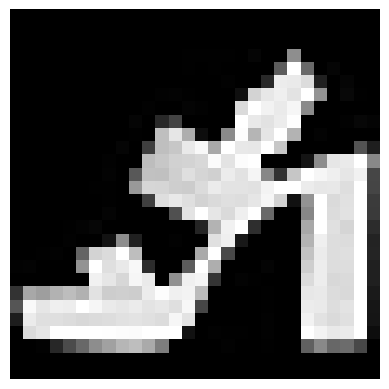

In [56]:
plt.imshow(X_train[2151], cmap='gray')
plt.axis('off')
plt.show()

# Preprocessing

In [57]:
def preprocess(data):
    data = data.reshape(-1, 28*28)
    data = data.astype(float) / 255
    return data

In [58]:
X_train = preprocess(X_train)
X_test = preprocess(X_test)

# Model building

In [67]:
model = tf.keras.Sequential([
    Input(shape=(X_train.shape[1], )), 
    Dense(512, activation='relu'), 
    Dense(256, activation='relu'),
    Dense(10)
])

In [68]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(),
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs=5,
    validation_split=0.30,
    batch_size=32,
    verbose=2
)

Epoch 1/5
1313/1313 - 8s - 6ms/step - accuracy: 0.8226 - loss: 0.4938 - val_accuracy: 0.8516 - val_loss: 0.4079
Epoch 2/5
1313/1313 - 7s - 5ms/step - accuracy: 0.8640 - loss: 0.3705 - val_accuracy: 0.8586 - val_loss: 0.3943
Epoch 3/5
1313/1313 - 7s - 5ms/step - accuracy: 0.8771 - loss: 0.3339 - val_accuracy: 0.8664 - val_loss: 0.3709
Epoch 4/5
1313/1313 - 7s - 5ms/step - accuracy: 0.8841 - loss: 0.3097 - val_accuracy: 0.8715 - val_loss: 0.3493
Epoch 5/5
1313/1313 - 7s - 5ms/step - accuracy: 0.8910 - loss: 0.2894 - val_accuracy: 0.8784 - val_loss: 0.3356


In [70]:
loss, acc = model.evaluate(
    X_test,
    y_test,
    batch_size=32,s
    verbose=2
)

313/313 - 1s - 2ms/step - accuracy: 0.8724 - loss: 0.3586


In [71]:
loss

0.3586052358150482

In [72]:
acc

0.8723999857902527